In [8]:
import nibabel as nib
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import cb_tools
from scipy import stats

In [3]:
# set results path
hcpS1200_data = '/nfs/p1/public_dataset/datasets/hcp/DATA/HCP_S1200_GroupAvg_v1/HCP_S1200_GroupAvg_v1/S1200.MyelinMap_BC_MSMAll.32k_fs_LR.dscalar.nii'
qmri_data_path = os.path.join(os.getcwd(), 'data/AllAdults_T1_map_Wlin_fs_LR_msm.dscalar.nii')

In [4]:
# load data
qmri_data =  cb_tools.CiftiReader(qmri_data_path).get_data()[0]

mri_data_path = hcpS1200_data
mri_data =  cb_tools.CiftiReader(mri_data_path).get_data()[0]

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [5]:
# msm parcel
atlas_dir = os.path.join(os.getcwd(), 'atlas')
atlas = cb_tools.atlas_load('cc_msm', atlas_dir)

# msm palette
color_msm = np.vstack(atlas.label_info['color'].values[:180]) / 255
brightness = np.argsort(color_msm.max(-1)*-1)
color_msm_sorted = color_msm[brightness]
palette_msm = sns.color_palette(color_msm)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [6]:
def myelin_scatter(myelin, palette, s=10, alpha=0.5, figsize=None):
    _, ax = plt.subplots(nrows=1,ncols=1,figsize=figsize)
    sns.scatterplot(x='t1w_t2w_ratio', y='T1', hue='msm', data=myelin[myelin['msm']<=180], 
                    s=s, alpha=alpha, palette=palette, ax=ax, legend=False)
    sns.scatterplot(x='t1w_t2w_ratio', y='T1', hue='msm', data=myelin[myelin['msm']>180], 
                    s=s, alpha=alpha, palette=palette, ax=ax, legend=False)

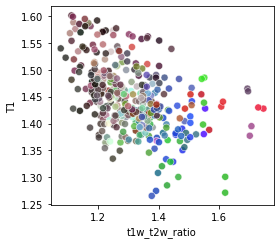

In [11]:
# plot
myelin = pd.DataFrame(np.c_[mri_data, qmri_data, atlas.data], columns=['t1w_t2w_ratio', 'T1', 'msm'])
mri_data_msm = cb_tools.roiing_volume(atlas.data, mri_data, method='nanmean', key=atlas.label_info['key'])[1]
qmri_data_msm = cb_tools.roiing_volume(atlas.data, qmri_data, method='nanmean', key=atlas.label_info['key'])[1]

myelin_msm = pd.DataFrame(np.c_[mri_data_msm, qmri_data_msm, np.arange(1,361,1)], columns=['t1w_t2w_ratio', 'T1', 'msm'])
myelin_scatter(myelin_msm, palette_msm, s=50, alpha=0.8, figsize=[4, 3.5])
plt.tight_layout()

# corr
corr_roi = stats.pearsonr(mri_data_msm, qmri_data_msm)
